# AQI Prediction Model Using Python

- PM2.5 PM10
- NO, NO2
- NH3 - Ammonia
- CO
- So2
- O3
- Berzene, Toluene, Xylene

In [1]:
pip install numpy pandas matplotlib seaborn scikit-learn

In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/air quality data.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Shape - rows and cols!
df.shape

(29531, 16)

In [6]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [8]:
# to know the duplicate values
df.duplicated().sum()

0

In [9]:
# To check missing values
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [10]:
# Drop the rows where 'AQI' has missing values
df.dropna(subset=['AQI'], inplace=True)

In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [12]:
df.shape

(24850, 16)

In [13]:
# Summary of Statistics in the dataset
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24172.000000,17764.000000,24463.000000,24459.000000,22993.000000,18314.000000,24405.000000,24245.000000,24043.000000,21315.000000,19024.000000,9478.000000,24850.000000
mean,67.476613,118.454435,17.622421,28.978391,32.289012,23.848366,2.345267,14.362933,34.912885,3.458668,9.525714,3.588683,166.463581
std,63.075398,89.487976,22.421138,24.627054,30.712855,25.875981,7.075208,17.428693,21.724525,16.036020,20.881085,6.754324,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.000000,56.777500,5.660000,11.940000,13.110000,8.960000,0.590000,5.730000,19.250000,0.230000,1.027500,0.390000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,80.925000,150.182500,20.030000,38.240000,40.170000,30.360000,1.480000,15.140000,46.080000,3.340000,10.180000,4.120000,208.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [14]:
# Precentage of the null vlaues in descending order
(df.isnull().mean()*100).sort_values(ascending=False)



,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


In [15]:
# Precentage of the null vlaues in descending
null_values_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
null_values_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


#### Key Considerations:
- Xylene has the highest percentage of missing values - 61.86%
- PM10 and NH3 28 - 26%

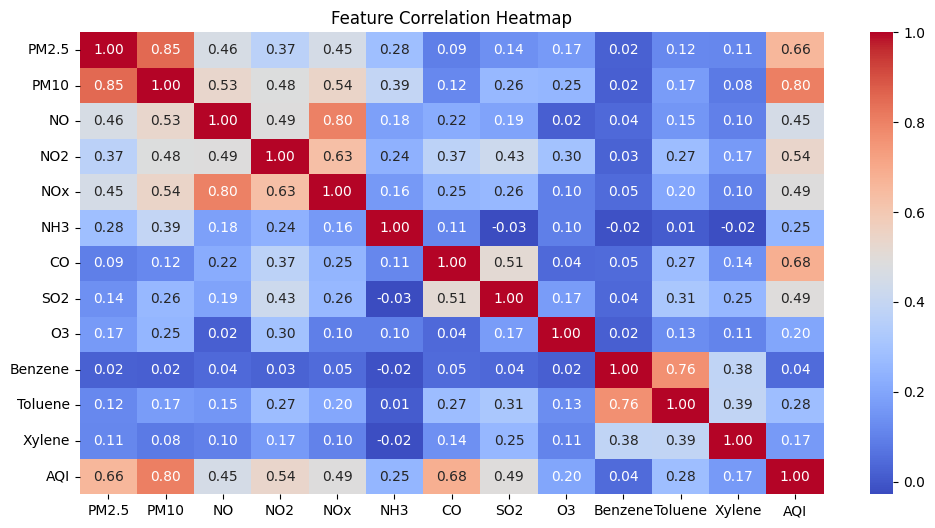

In [16]:
# Checking Feature Correlation:
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



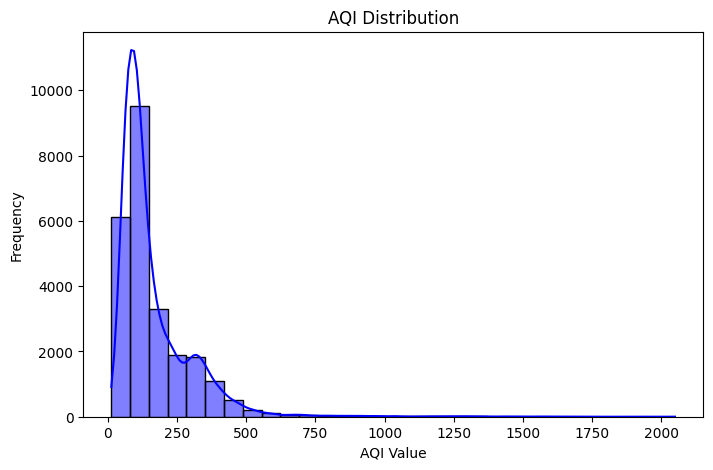

In [17]:
# Distribution of AQI Values
plt.figure(figsize=(8, 5))
sns.histplot(df['AQI'], bins=30, kde=True, color='blue')
plt.title("AQI Distribution")
plt.xlabel("AQI Value")
plt.ylabel("Frequency")
plt.show()

In [18]:
# Handling Categorical Data (if present):
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)


Categorical Columns: Index(['City', 'Date', 'AQI_Bucket'], dtype='object')


In [19]:
# Filling Missing Values Instead of Dropping Rows:
df.fillna(df.select_dtypes(include=['number']).median(), inplace=True)



In [20]:
#Train-Test Split and Feature Scaling:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Drop non-numeric columns or encode them
X = df.drop(columns=['AQI'])  # Ensure AQI is the target
y = df['AQI']

# Convert categorical columns using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert categories to numbers

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Week -2 Visualization

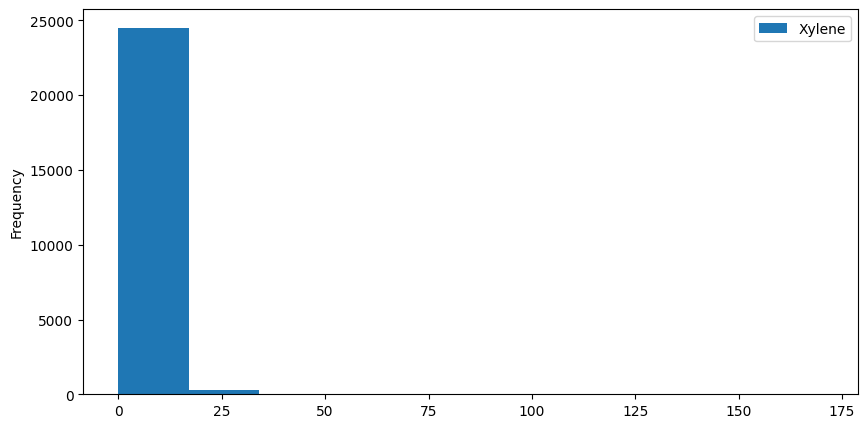

In [21]:
# univariance analysis
df['Xylene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

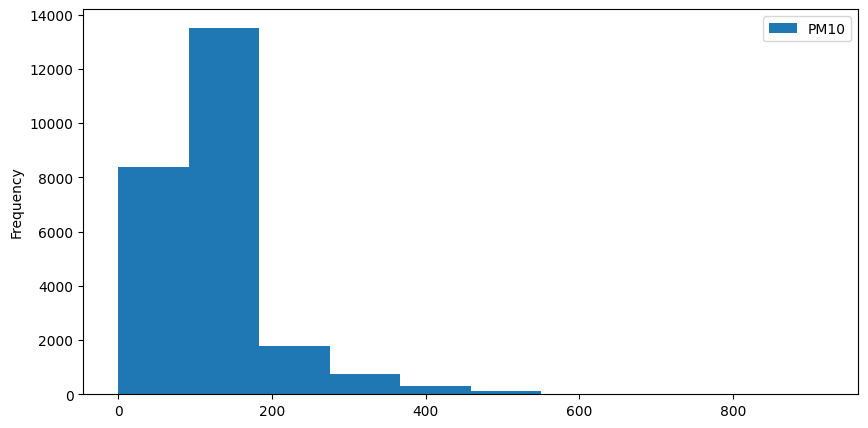

In [22]:
df['PM10'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

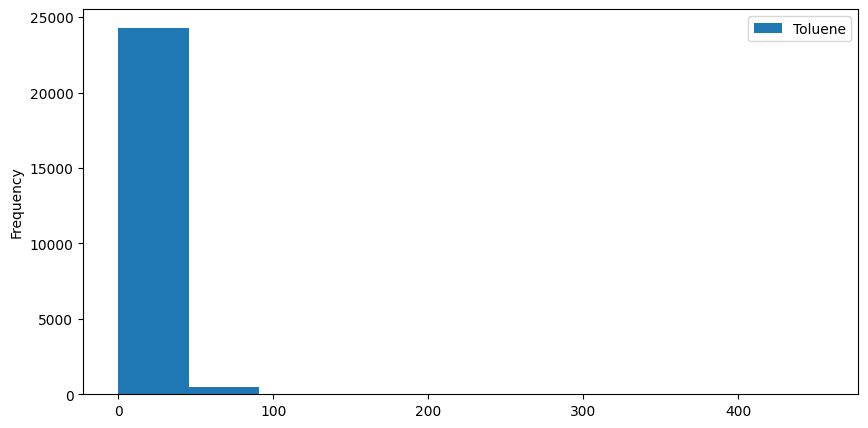

In [23]:
df['Toluene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

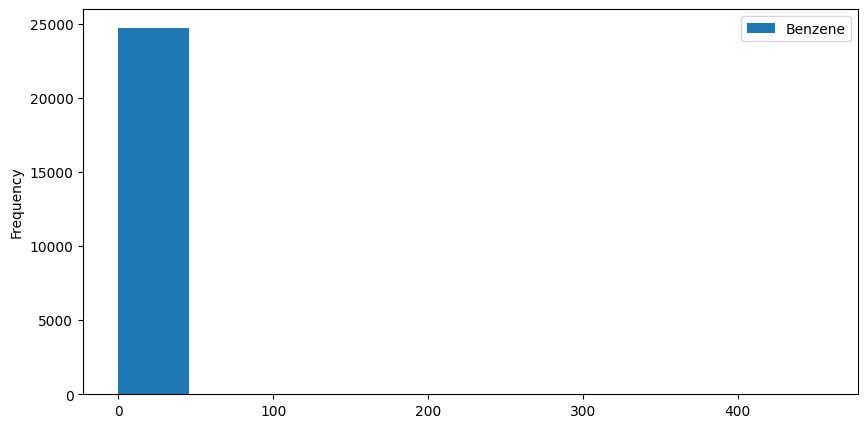

In [24]:
df['Benzene'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

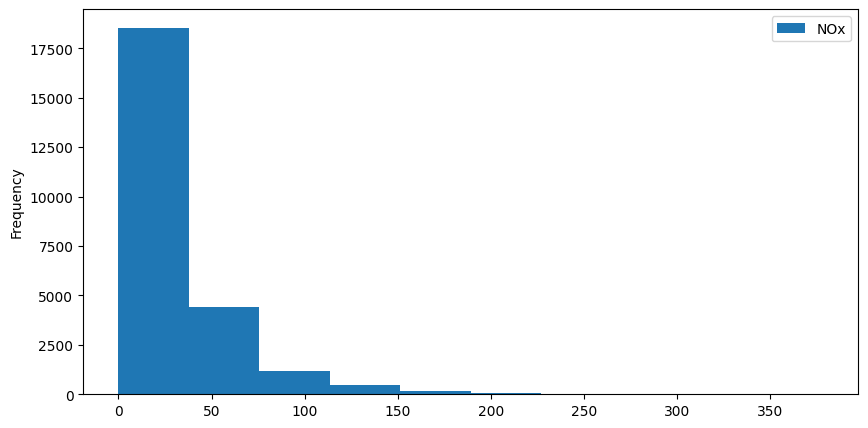

In [25]:
df['NOx'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

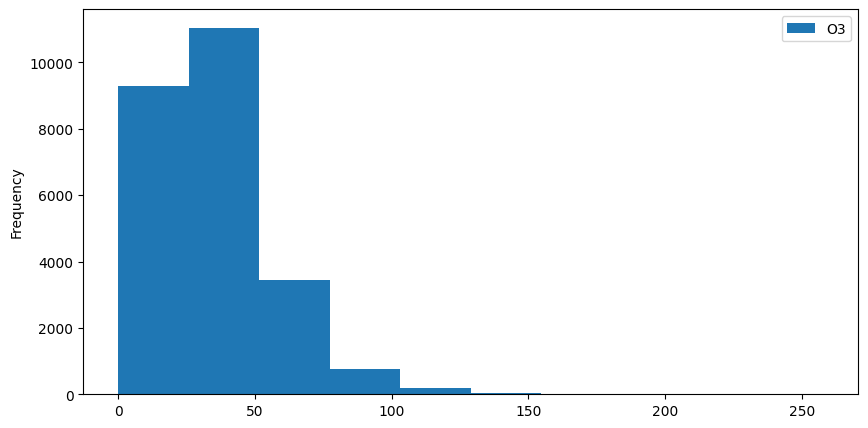

In [26]:
df['O3'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

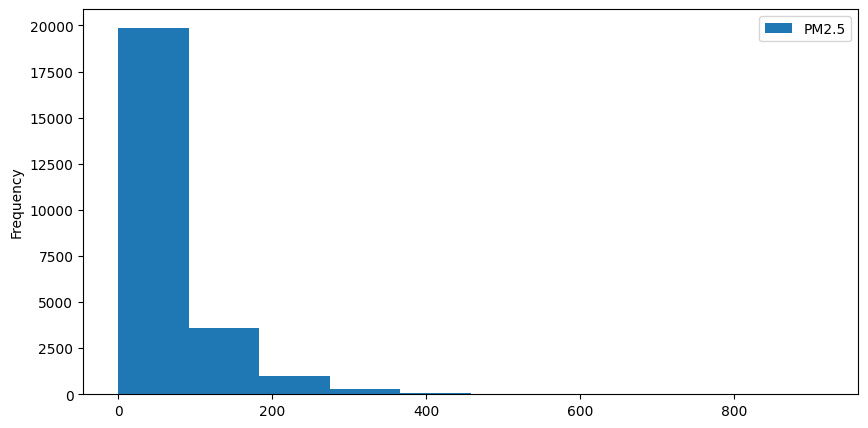

In [27]:
df['PM2.5'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

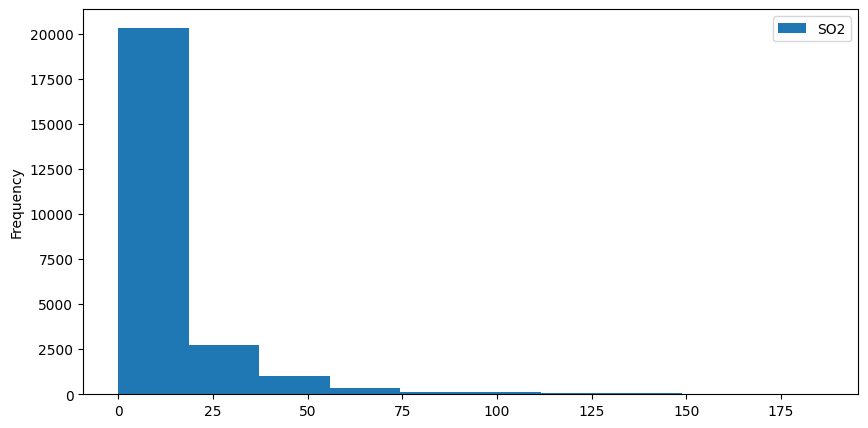

In [28]:
df['SO2'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

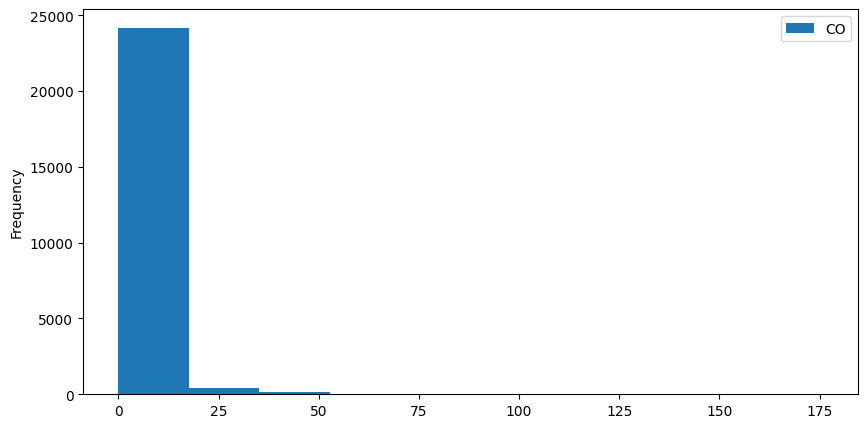

In [29]:
df['CO'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

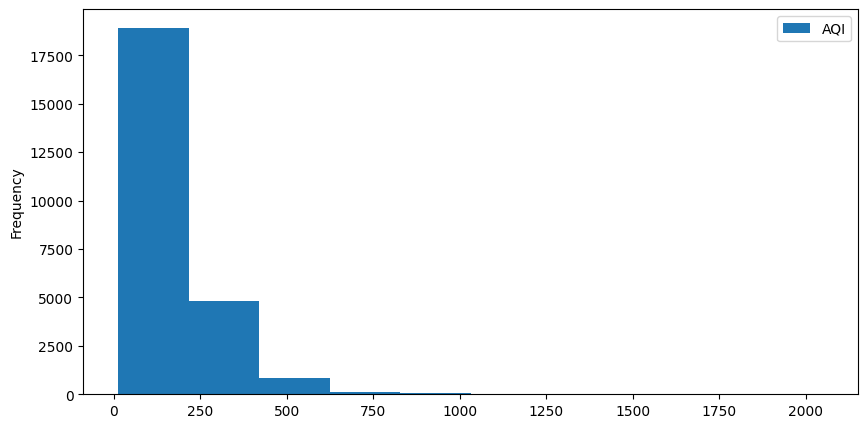

In [30]:
df['AQI'].plot(kind ='hist',figsize=(10,5))
plt.legend()
plt.show()

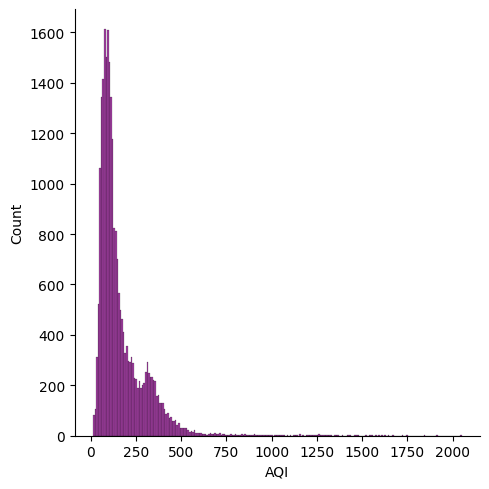

In [31]:
# Distribution of AQI 2015-2020
sns.displot(df['AQI'],color = 'purple')
plt.show()

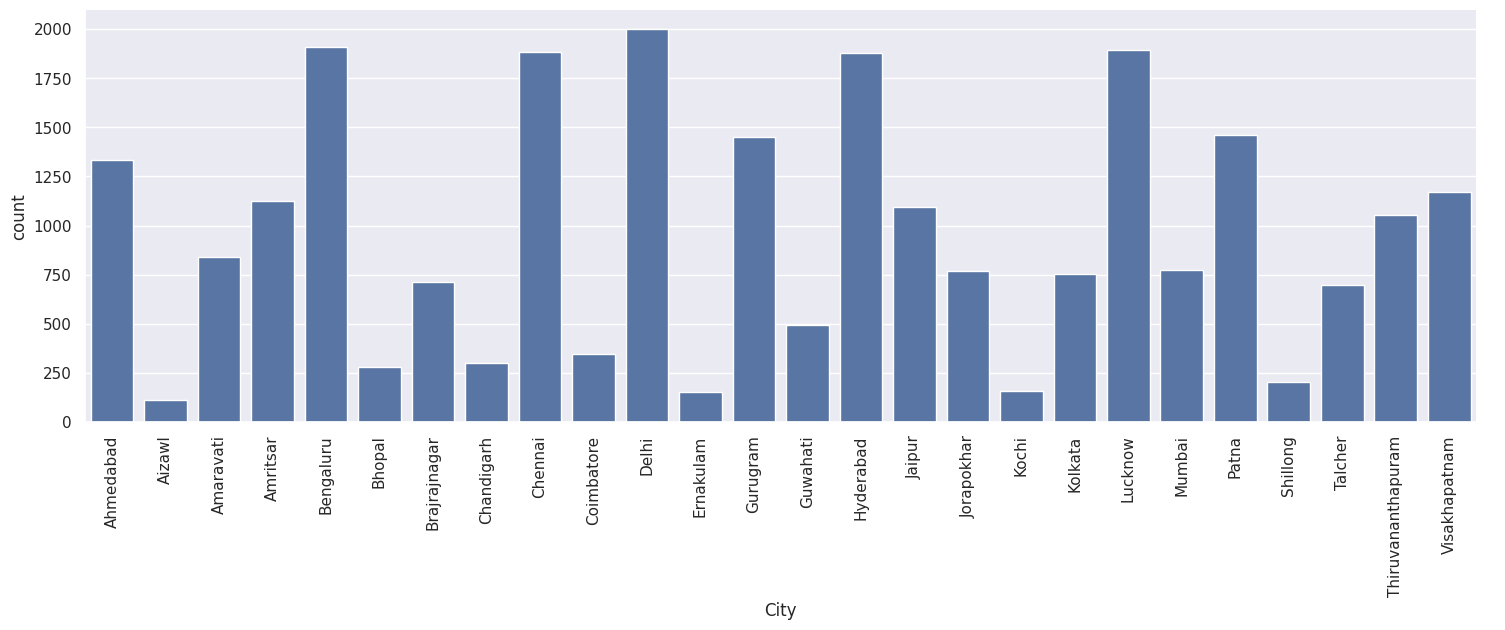

In [32]:
# Bivariate
sns.set_theme(style = 'darkgrid')
graph = sns.catplot(x='City',kind='count',data = df, height=5,aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()


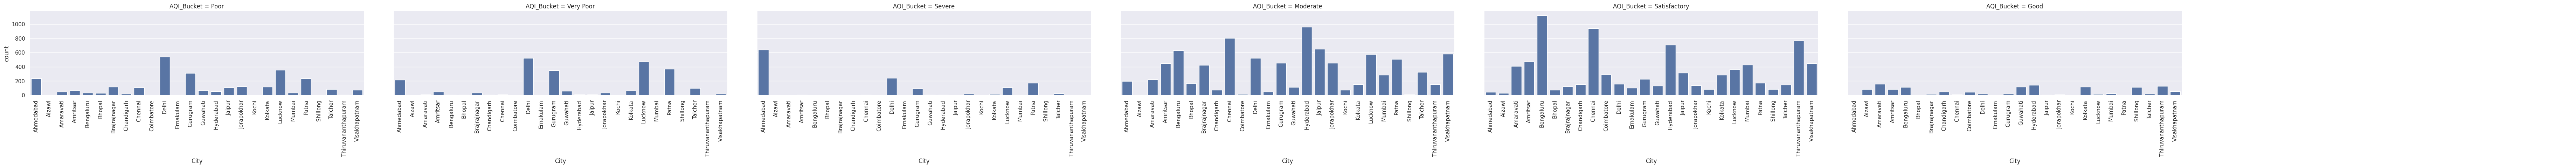

In [33]:
sns.set_theme(style = 'darkgrid')
graph = sns.catplot(x='City',kind='count',data = df,col ="AQI_Bucket", col_wrap =7,height=3.5,aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()

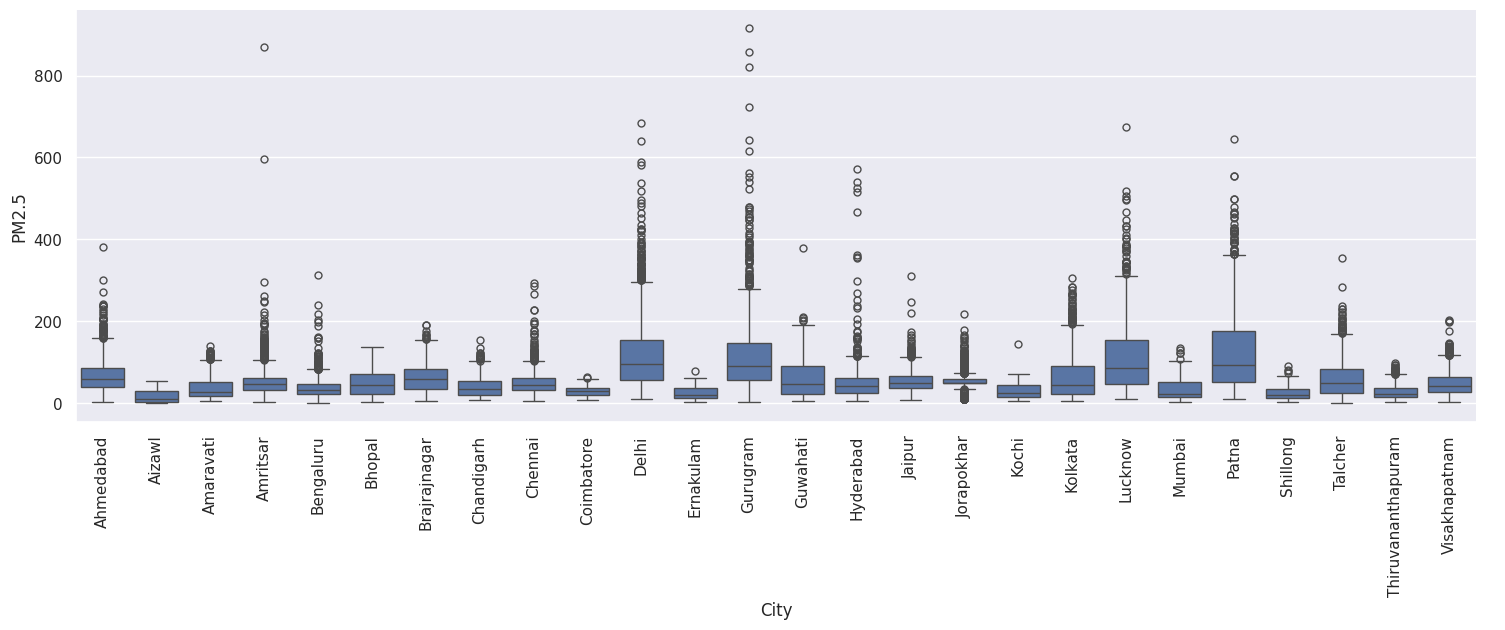

In [34]:
graph1 =sns.catplot(x='City',y='PM2.5',kind='box',data = df,height=5,aspect=3)
graph1.set_xticklabels(rotation=90)
plt.show()

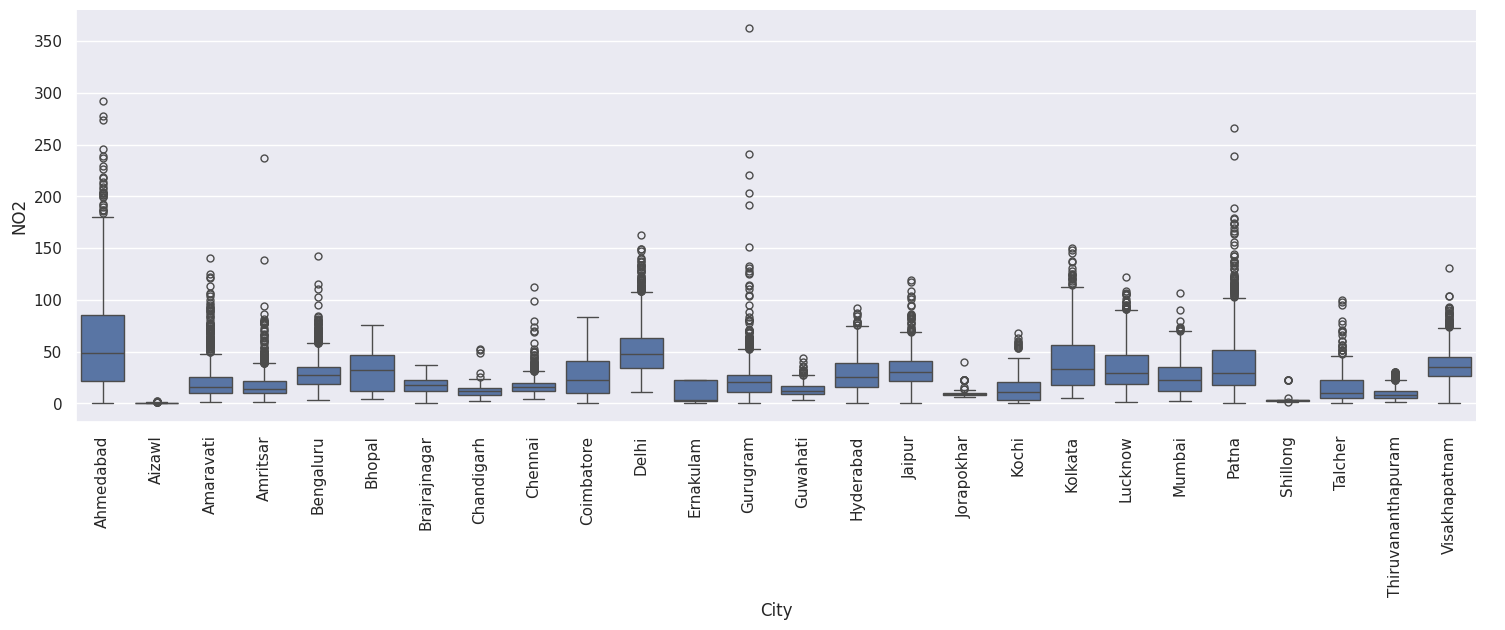

In [35]:
graph2 =sns.catplot(x='City',y='NO2',kind='box',data = df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)
plt.show()

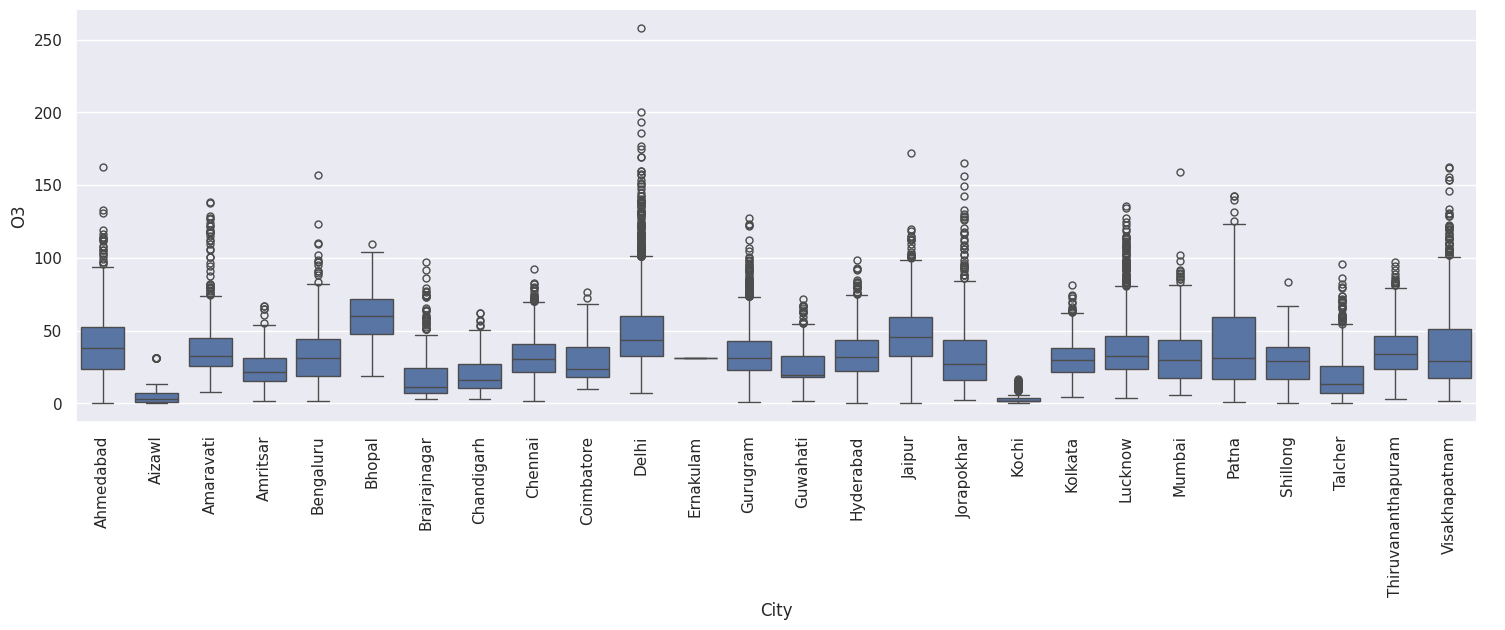

In [36]:
graph3 =sns.catplot(x='City',y='O3',kind='box',data = df,height=5,aspect=3)
graph3.set_xticklabels(rotation=90)
plt.show()

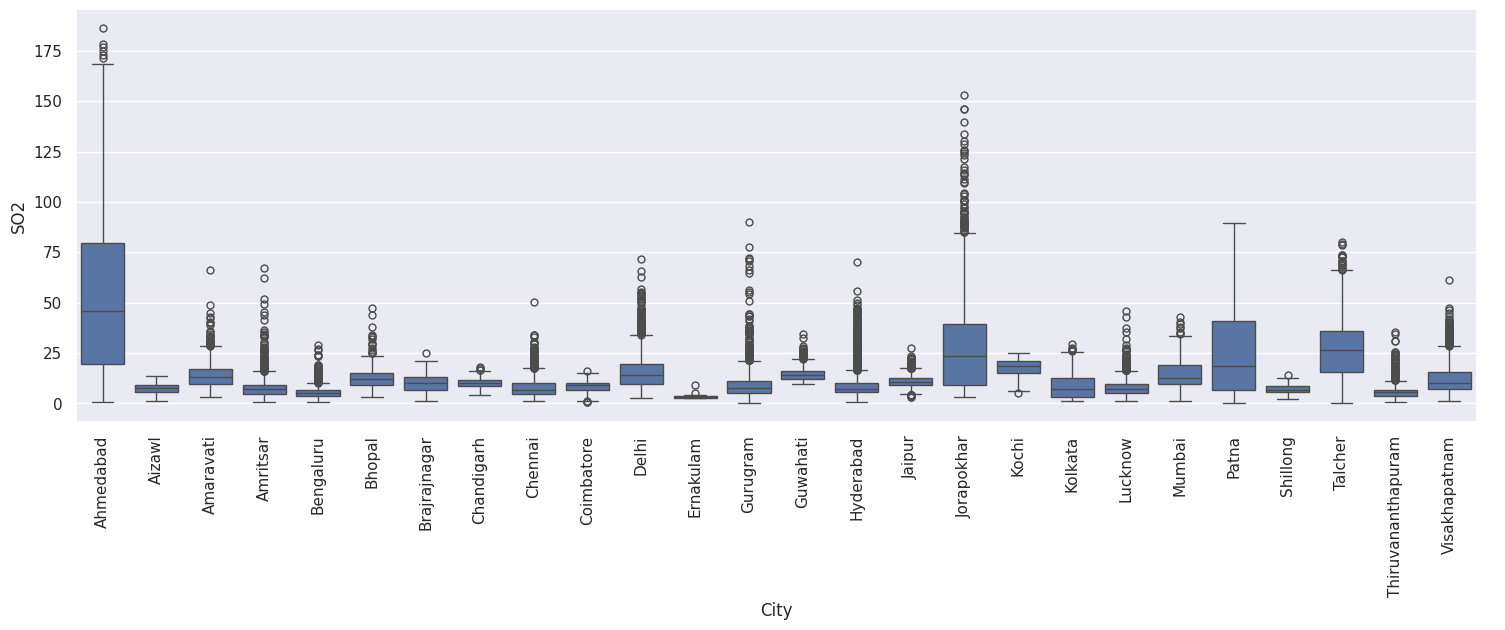

In [37]:
graph4 =sns.catplot(x='City',y='SO2',kind='box',data = df,height=5,aspect=3)
graph4.set_xticklabels(rotation=90)
plt.show()

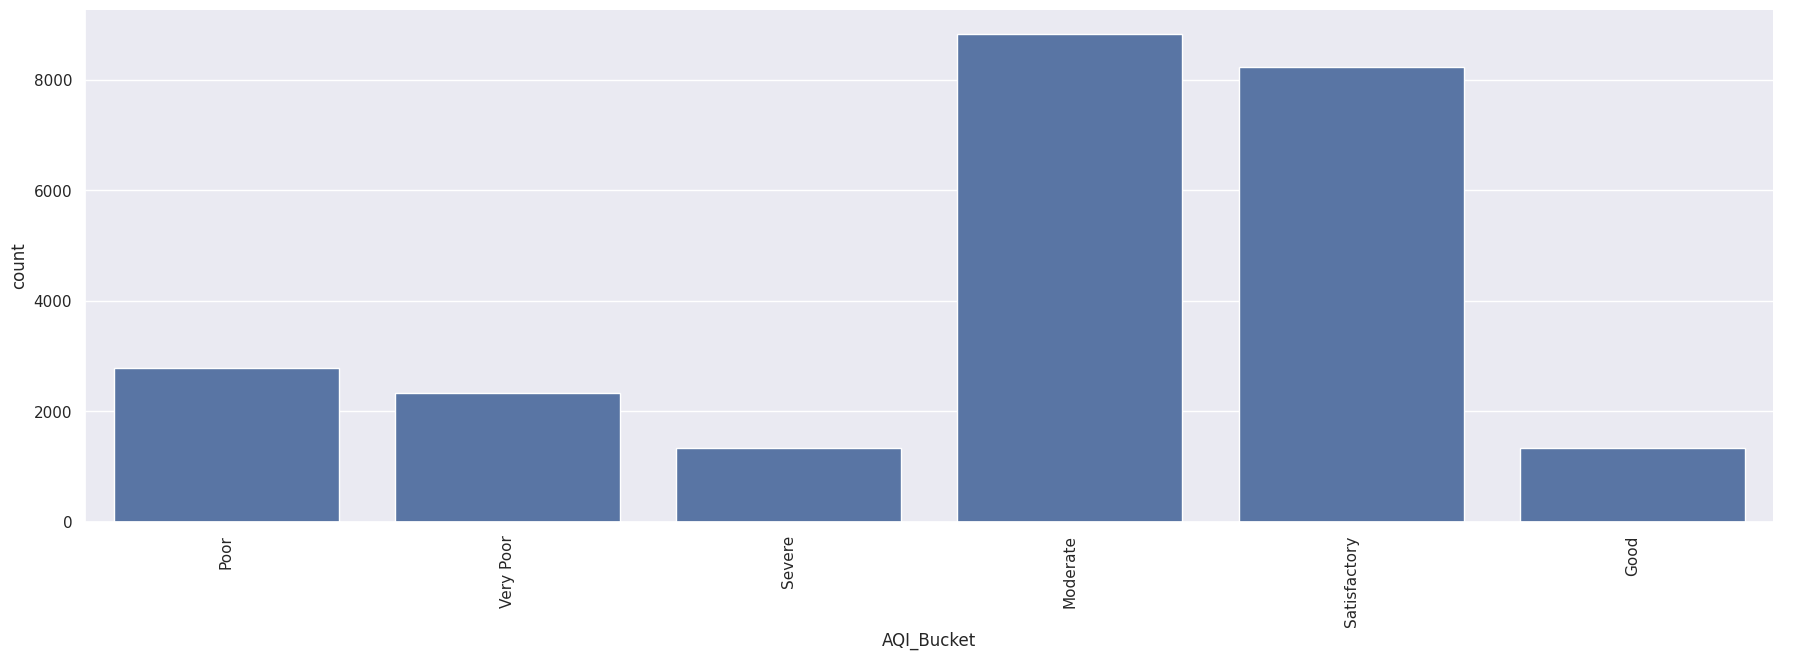

In [38]:
graph5 =sns.catplot(x='AQI_Bucket',kind='count',data = df,height=6,aspect=3)
graph5.set_xticklabels(rotation=90)
plt.show()

In [39]:
# To check the null values
df.isnull().sum().sort_values(ascending=False)

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [40]:
df.describe().loc['mean']

,mean
PM2.5,66.966637
PM10,112.102860
NO,17.502312
NO2,28.870163
NOx,31.645675
NH3,21.865639
CO,2.319923
SO2,14.237723
O3,34.793934
Benzene,3.150167


In [41]:
df = df.replace({
    "PM2.5":{np.nan:66.966637},
    "PM10":{np.nan:112.102860},
    "NO":{np.nan:17.502312},
    "NO2":{np.nan:28.870163},
    "NOx":{np.nan:31.645675},
    "NH3":{np.nan:21.865639},
    "CO":{np.nan:112.102860},
    "SO2":{np.nan:2.319923},
    "O3":{np.nan:34.793934},
    "Benzene	":{np.nan:3.150167},
    "Toluene":{np.nan:8.130589},
    "Xylene":{np.nan:2.247154},
    "AQI":{np.nan:166.463581},


})

In [42]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [43]:
df=df.drop(['AQI_Bucket'],axis=1)

In [44]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,96.18,6.93,28.71,33.72,16.31,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,96.18,13.85,28.68,41.08,16.31,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,96.18,24.39,32.66,52.61,16.31,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,96.18,43.48,42.08,84.57,16.31,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,96.18,54.56,35.31,72.80,16.31,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

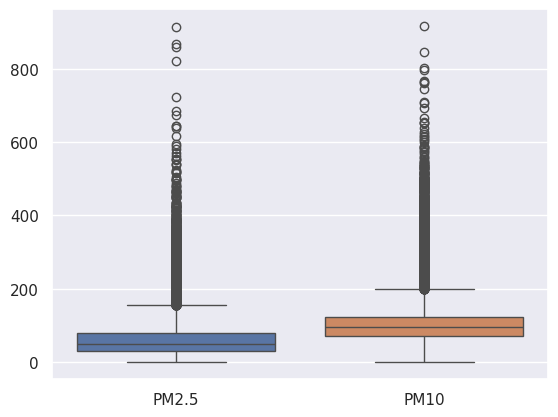

In [45]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

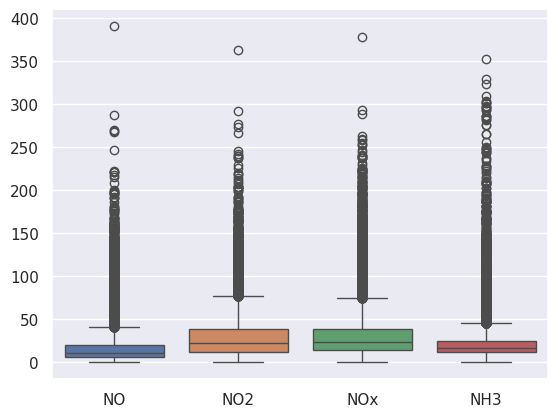

In [46]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

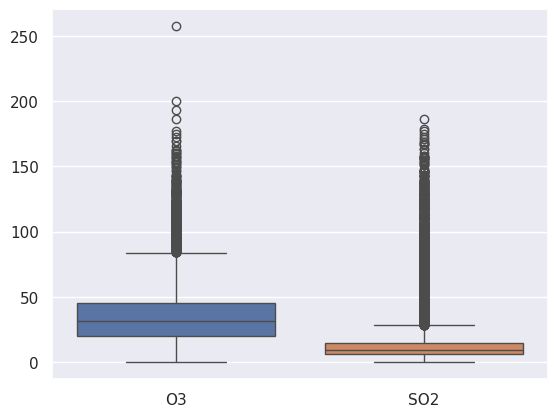

In [47]:
sns.boxplot(data=df[['O3','SO2']])

In [48]:
# IQR Method = Q3 Q1
def replace_outliers(df):
  for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(
        lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
    )
    return df

In [49]:
df = replace_outliers(df)

In [50]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,54.664304,112.102860,17.502312,28.870163,31.645675,21.865639,2.319923,14.237723,34.793934,3.150167,8.130589,2.247154,166.463581
std,31.778076,76.325808,22.266346,24.447523,29.629575,22.460343,7.014082,17.233456,21.378711,14.870955,18.443104,4.302180,140.696585
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,29.560000,71.780000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.640000,0.340000,1.580000,1.420000,81.000000
50%,48.785000,96.180000,9.910000,22.100000,23.680000,16.310000,0.930000,9.220000,31.250000,1.290000,3.575000,1.420000,118.000000
75%,79.505625,122.957500,19.710000,37.910000,38.170000,24.710000,1.460000,14.890000,45.397500,2.850000,7.380000,1.420000,208.000000
max,154.300000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


<Axes: >

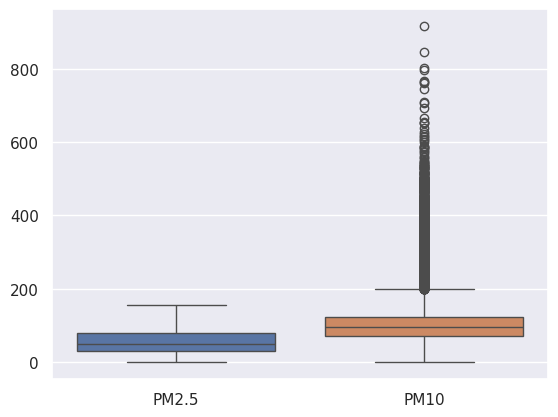

In [51]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

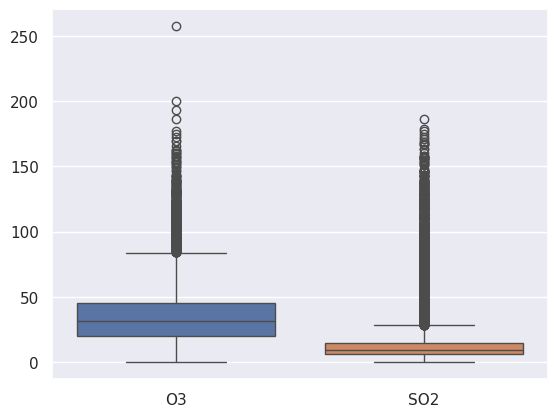

In [52]:
sns.boxplot(data=df[['O3','SO2']])

<function matplotlib.pyplot.show(close=None, block=None)>

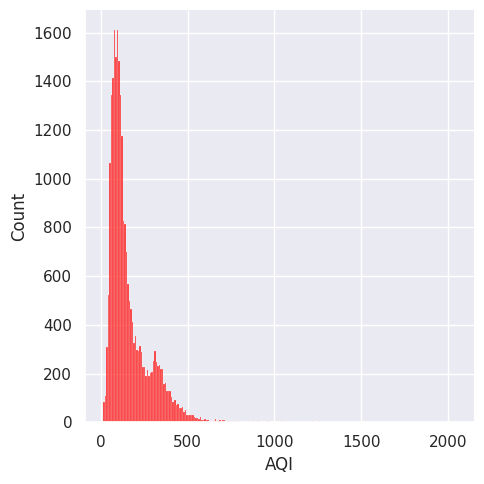

In [53]:
sns.displot(df,x='AQI' , color='red')
plt.show

In [54]:
df1 = df.drop(columns =['City'])

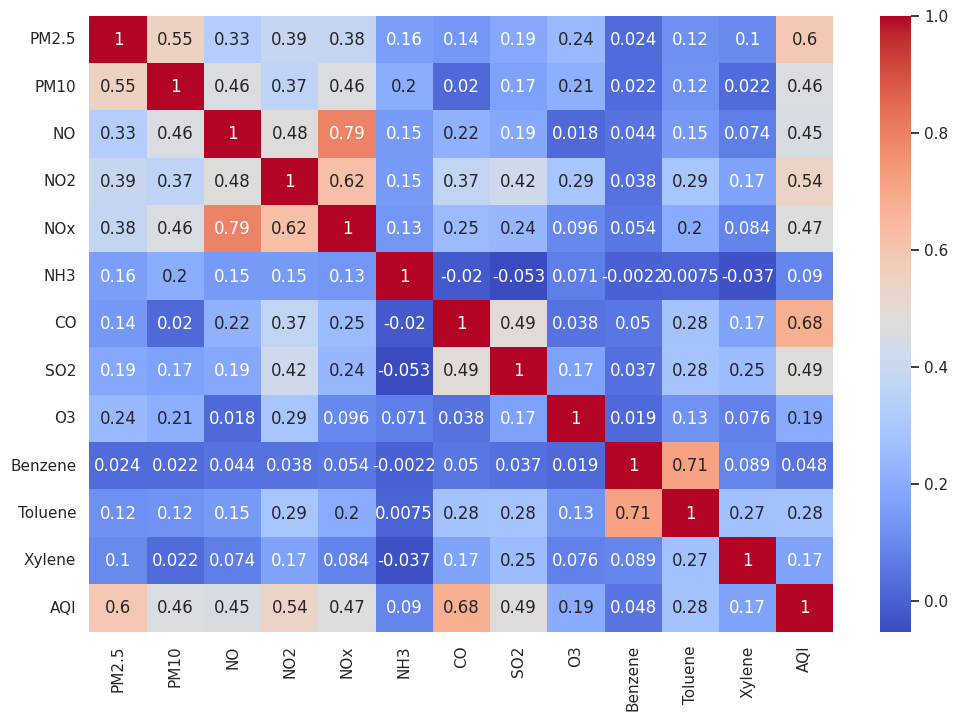

In [55]:
# Multivariante Analysis
df_numeric = df1.select_dtypes(include=['number'])

# Plot heatmap with a valid colormap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')  # Change 'Pastel' to 'coolwarm'
plt.show()

# Week - 3 Data Modeling


In [59]:
df.drop(['Date','City'],axis= 1, inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,96.18,6.93,28.71,33.72,16.31,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,79.8400,96.18,13.85,28.68,41.08,16.31,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,94.5200,96.18,24.39,32.66,52.61,16.31,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,135.9900,96.18,43.48,42.08,84.57,16.31,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,79.5075,96.18,54.56,35.31,72.80,16.31,54.56,55.04,107.38,0.46,0.06,35.61,914.0


In [60]:
# Scaling - Standard Scler
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df)
df1

array([[ 0.89578325, -0.20862118, -0.47482081, ..., -0.44085596,
         0.20753754,  0.30233338],
       [ 0.79225067, -0.20862118, -0.16403164, ..., -0.44085596,
         0.59572066,  1.14814207],
       [ 1.25421366, -0.20862118,  0.30933798, ..., -0.44031374,
         1.26051331,  2.47016238],
       ...,
       [-0.99927204, -0.60757684, -0.63111362, ..., -0.44031374,
        -0.5223397 , -0.6998433 ],
       [-1.19658185, -0.81406423, -0.60416659, ..., -0.44085596,
        -0.5223397 , -0.79935021],
       [-1.24819079, -0.6040393 , -0.7680944 , ..., -0.24701267,
        -0.19226782, -0.82778075]])

In [61]:
df = pd.DataFrame(df1,columns=df.columns)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.895783,-0.208621,-0.474821,-0.006551,0.070010,-0.247358,0.657273,2.047354,1.167824,-0.210493,-0.440856,0.207538,0.302333
1,0.792251,-0.208621,-0.164032,-0.007779,0.318415,-0.247358,1.643880,1.987585,2.913053,-0.209148,-0.440856,0.595721,1.148142
2,1.254214,-0.208621,0.309338,0.155022,0.707562,-0.247358,3.146602,3.084312,3.580085,-0.195699,-0.440314,1.260513,2.470162
3,2.559228,-0.208621,1.166703,0.540345,1.786235,-0.247358,5.868324,3.539250,3.176405,-0.184939,-0.438687,5.491012,4.375009
4,0.781787,-0.208621,1.664325,0.263420,1.388989,-0.247358,7.448035,2.367668,3.395318,-0.180904,-0.437603,7.755026,5.313217


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# Feature & Target Selection
X = df [['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']]
y = df['AQI']

In [67]:
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
0,0.895783,-0.208621,-0.474821,-0.006551,0.070010,-0.247358,0.657273,2.047354,1.167824,-0.210493,-0.440856,0.207538
1,0.792251,-0.208621,-0.164032,-0.007779,0.318415,-0.247358,1.643880,1.987585,2.913053,-0.209148,-0.440856,0.595721
2,1.254214,-0.208621,0.309338,0.155022,0.707562,-0.247358,3.146602,3.084312,3.580085,-0.195699,-0.440314,1.260513
3,2.559228,-0.208621,1.166703,0.540345,1.786235,-0.247358,5.868324,3.539250,3.176405,-0.184939,-0.438687,5.491012
4,0.781787,-0.208621,1.664325,0.263420,1.388989,-0.247358,7.448035,2.367668,3.395318,-0.180904,-0.437603,7.755026


In [68]:
# Split the data into training and testing data - Traning set -80% | Testing -20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Shape of X Train',X_train.shape)
print('Shape of X Test',X_test.shape)
print('Shape of y Train',y_train.shape)
print('Shape of y Test',y_test.shape)

Shape of X Train (19880, 12)
Shape of X Test (4970, 12)
Shape of y Train (19880,)
Shape of y Test (4970,)


In [69]:
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [70]:
# Predicting the Values:
train_pred = LR.predict(X_train) # predicting train
test_pred = LR.predict(X_test) # predicting test

In [74]:
# Evalution for Linear Regression
RMSE_train = np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test,test_pred))
print('RMSE Training Data = ',str(RMSE_train))
print('RMSE Testing Data = ',str(RMSE_test))
print('_'*60)
print('R Squared value for Train = ' ,LR.score(X_train,y_train))
print('R Squared value for Test = ' ,LR.score(X_test,y_test))


RMSE Training Data =  0.4721701930043215
RMSE Testing Data =  0.4864094793682105
____________________________________________________________
R Squared value for Train =  0.7811493308825115
R Squared value for Test =  0.7442349891589424


In [75]:
# KNN
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [76]:
# Predicting the Values:
train_pred = knn.predict(X_train) # predicting train
test_pred = knn.predict(X_test) # predicting test

# Evaluation for KNN
RMSE_train = np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test,test_pred))
print('RMSE Training Data = ',str(RMSE_train))
print('RMSE Testing Data = ',str(RMSE_test))
print('_'*60)
print('R Squared value for Train = ' ,knn.score(X_train,y_train))
print('R Squared value for Test = ' ,knn.score(X_test,y_test))

RMSE Training Data =  0.30212344101805594
RMSE Testing Data =  0.3764569181197945
____________________________________________________________
R Squared value for Train =  0.9103976111424278
R Squared value for Test =  0.8467968704895834


In [77]:
# Decision Tree
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)



DecisionTreeRegressor()

In [78]:
# predicting the values:
train_pred = dtr.predict(X_train) # predicting train
test_pred = dtr.predict(X_test) # predicting test

#Evaluation for DTR
RMSE_train = np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test,test_pred))
print('RMSE Training Data = ',str(RMSE_train))
print('RMSE Testing Data = ',str(RMSE_test))
print('_'*60)
print('R Squared value for Train = ' ,dtr.score(X_train,y_train))
print('R Squared value for Test = ' ,dtr.score(X_test,y_test))

RMSE Training Data =  0.021678786736224087
RMSE Testing Data =  0.48480070306033957
____________________________________________________________
R Squared value for Train =  0.9995386604479184
R Squared value for Test =  0.7459240525947887


In [79]:
# Random Forest Regressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [81]:
# predicting the values:
train_pred = rfr.predict(X_train) # predicting train
test_pred = rfr.predict(X_test) # predicting test

#Evaluation for RFR
RMSE_train = np.sqrt(mean_squared_error(y_train,train_pred))
RMSE_test = np.sqrt(mean_squared_error(y_test,test_pred ))
print('RMSE Training Data = ',str(RMSE_train))
print('RMSE Testing Data = ',str(RMSE_test))
print('_'*60)
print('R Squared value for Train = ' ,rfr.score(X_train,y_train))

RMSE Training Data =  0.12360170789671616
RMSE Testing Data =  0.32104279345540027
____________________________________________________________
R Squared value for Train =  0.9850031624511276
